## 1. train path의 정보가 다른 컬럼과 같은지 체크

In [38]:
import pandas as pd

train = pd.read_csv('/opt/ml/input/data/train/train.csv')

In [125]:
train.sample(5)

,id,gender,race,age,path
415,001037,male,Asian,18,001037_male_Asian_18
395,001019,male,Asian,29,001019_male_Asian_29
80,000243,female,Asian,58,000243_female_Asian_58
2425,006392,male,Asian,19,006392_male_Asian_19
1997,005044,male,Asian,51,005044_male_Asian_51


In [126]:
path.describe(include='all')

,index,gender,race,age
count,2700,2700,2700,2700.000000
unique,2699,2,1,NaN
top,003397,female,Asian,NaN
freq,2,1658,2700,NaN
mean,NaN,NaN,NaN,37.708148
std,NaN,NaN,NaN,16.985904
min,NaN,NaN,NaN,18.000000
25%,NaN,NaN,NaN,20.000000
50%,NaN,NaN,NaN,36.000000
75%,NaN,NaN,NaN,55.000000


In [73]:
path_list = []
for i in list(train['path']):
    index,gender,race,age = i.split("_")
    path_list.append([index,gender,race,int(age)])

In [80]:
path = pd.DataFrame(path_list)
path.columns = ['index','gender','race','age']

In [63]:
train.columns

Index(['id', 'gender', 'race', 'age', 'path'], dtype='object')

In [64]:
path.columns

Index(['index', 'gender', 'race', 'age'], dtype='object')

In [67]:
print(sum(path['gender'] != train['gender']))
print(sum(path['race'] != train['race']))
print(sum(path['age'] != train['age']))

0
0
0


### 같음
---

## 2. 성별, 연령별 barplot, histogram

In [83]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [94]:
group = train.groupby('gender').sum()

,age
gender,
female,63880
male,37932


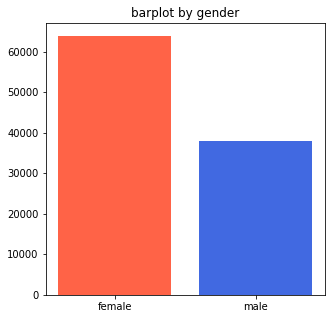

In [103]:
fig, axes = plt.subplots(1,1,figsize=(5,5))
color=['tomato','royalblue']
axes.bar(group.index,group['age'],color=color)
axes.set_title("barplot by gender")
plt.show()

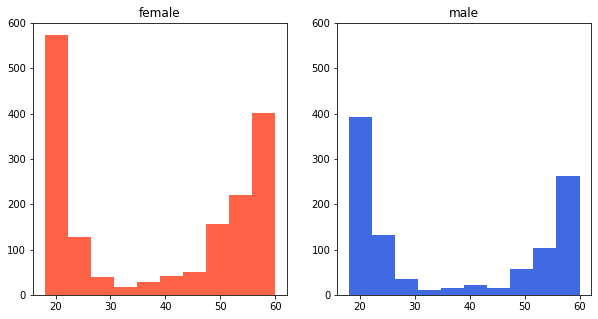

In [124]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
color=['tomato','royalblue']
axes[1].hist(train[train['gender'] == 'male']['age'], color=color[1])
axes[0].hist(train[train['gender'] == 'female']['age'], color=color[0])
for ax in axes:
    ax.set_ylim(0, 600)
axes[0].set_title('female')
axes[1].set_title('male')
plt.show()

### 여성이 남성보다 약 0.5배 많다.
### 두 성별의 분포는 비슷하다.
### 30대에 가까울수록 데이터가 적은 경향이 있다.